# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

runtime of above: ~ 52.6 s

In [2]:
# ChatGPT3 recommended libraries:
from scipy.spatial.distance import pdist, squareform

# https://docs.xlwings.org/en/latest/jupyternotebooks.html
from xlwings import view
from xlwings import load

## Loading the dataset

In [3]:
## Complete the code to import the data
data = pd.read_csv('../data/stock_data.csv')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [4]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [5]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


### Checking the data types of the columns for the dataset

In [6]:
# checking the column names and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

### Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking for duplicates and missing values

In [8]:
# checking for duplicate values
df.duplicated().sum() ## Complete the code to get total number of duplicate values

0

In [9]:
# checking for missing values in the data
df.isna().sum() ## Complete the code to check the missing values in the data

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Statistical summary of the dataset

**Let's check the statistical summary of the data.**

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


## Exploratory Data Analysis

### Univariate analysis

In [11]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

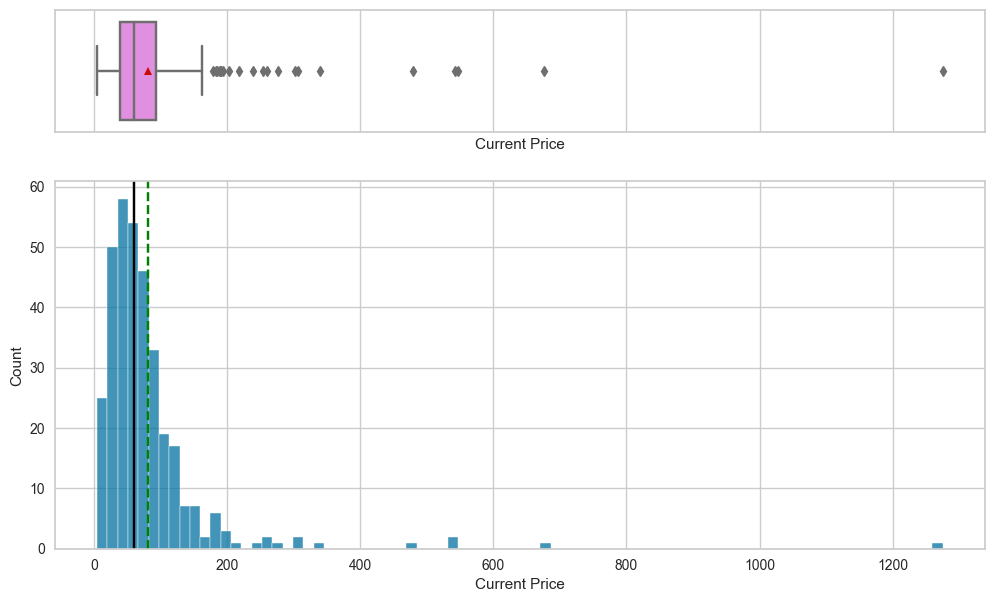

In [12]:
histogram_boxplot(df, 'Current Price')

**`Price Change`**

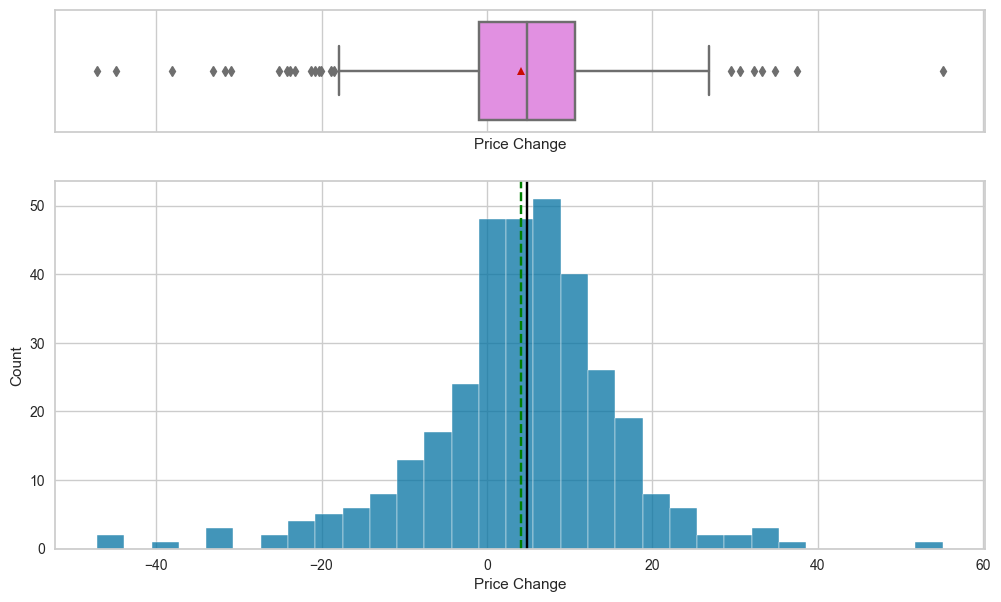

In [13]:
histogram_boxplot(df, 'Price Change')  ## Complete the code to create histogram_boxplot for 'Price Change'

**`Volatility`**

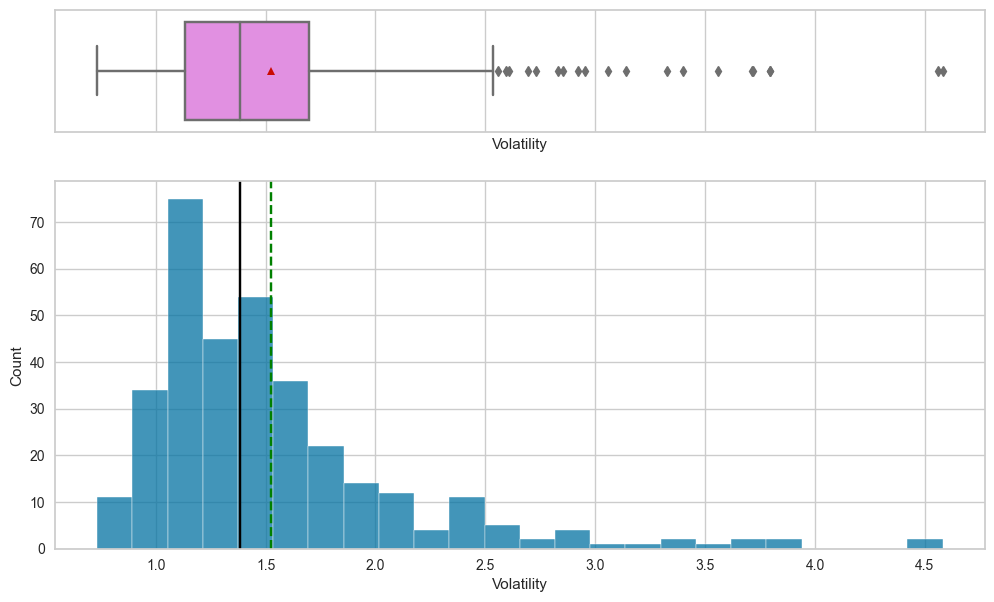

In [14]:
histogram_boxplot(df=df,feature='Volatility')  ## Complete the code to create histogram_boxplot for 'Volatility'

**`ROE`**

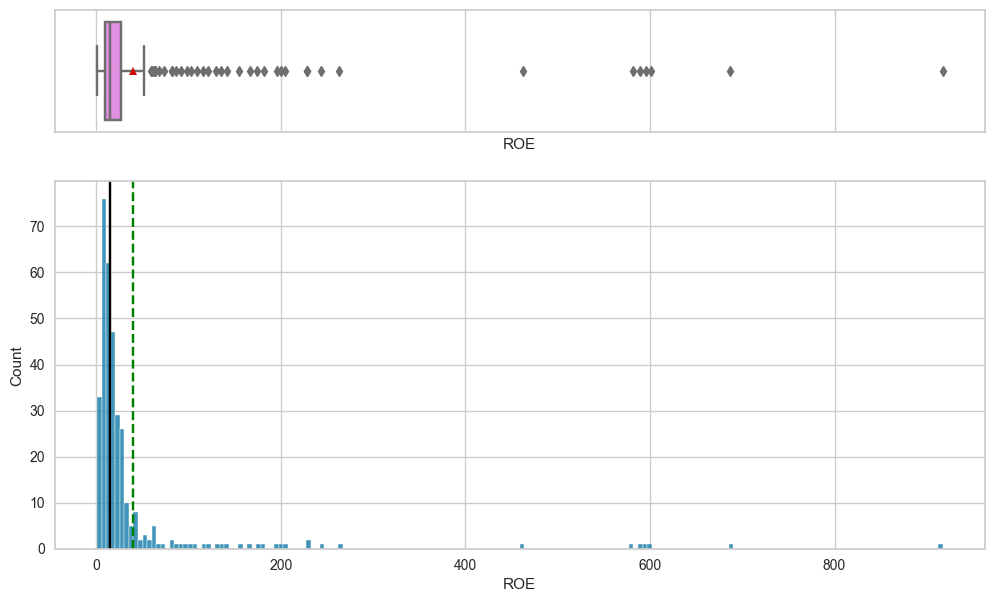

In [15]:
histogram_boxplot(df=df,feature='ROE')  ## Complete the code to create histogram_boxplot for 'ROE'

**`Cash Ratio`**

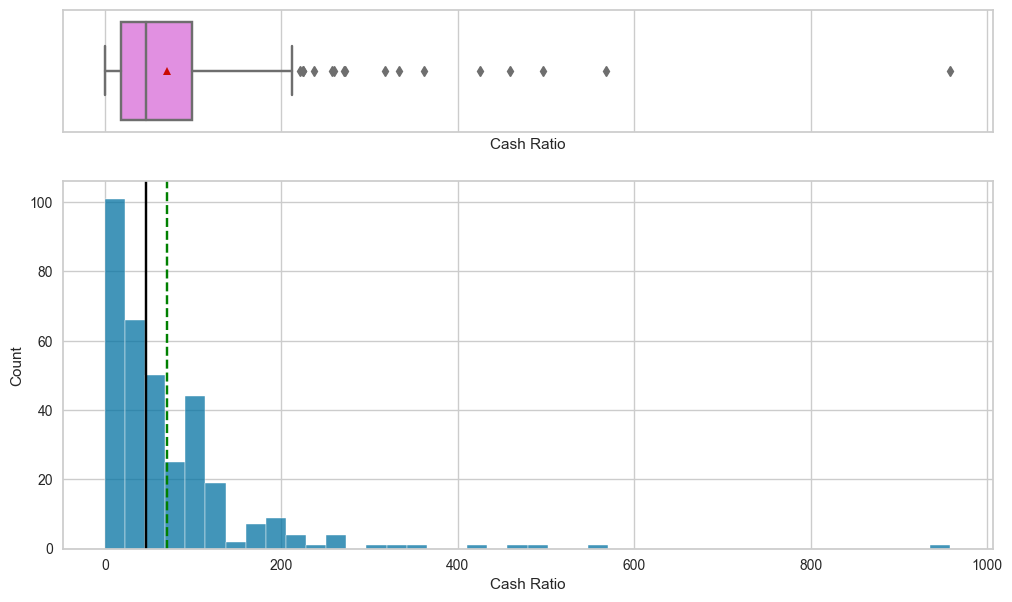

In [16]:
histogram_boxplot(df=df,feature='Cash Ratio')  ## Complete the code to create histogram_boxplot for 'Cash Ratio'

**`Net Cash Flow`**

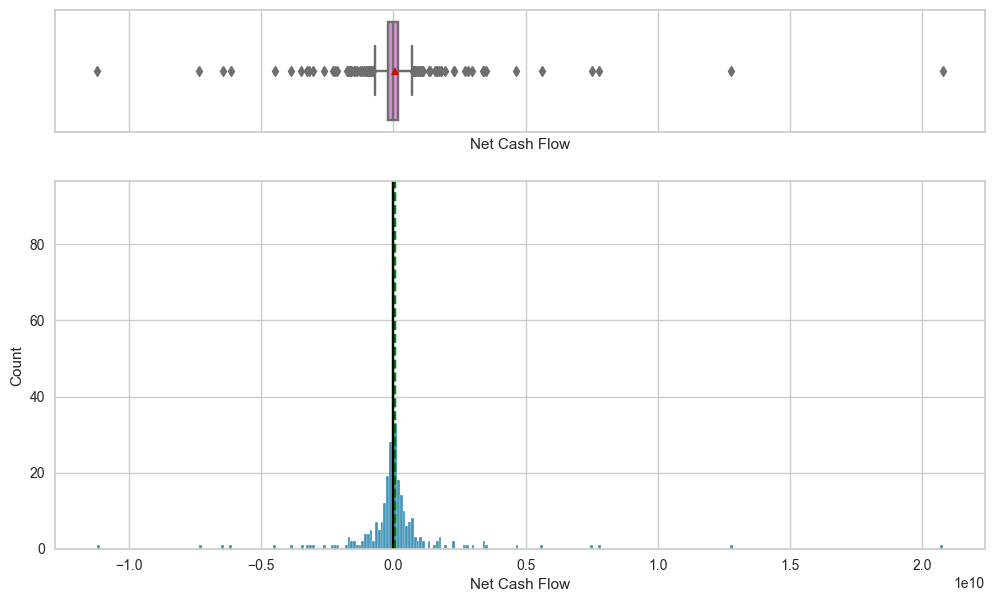

In [17]:
histogram_boxplot(df=df,feature='Net Cash Flow')  ## Complete the code to create histogram_boxplot for 'Net Cash Flow'

**`Net Income`**

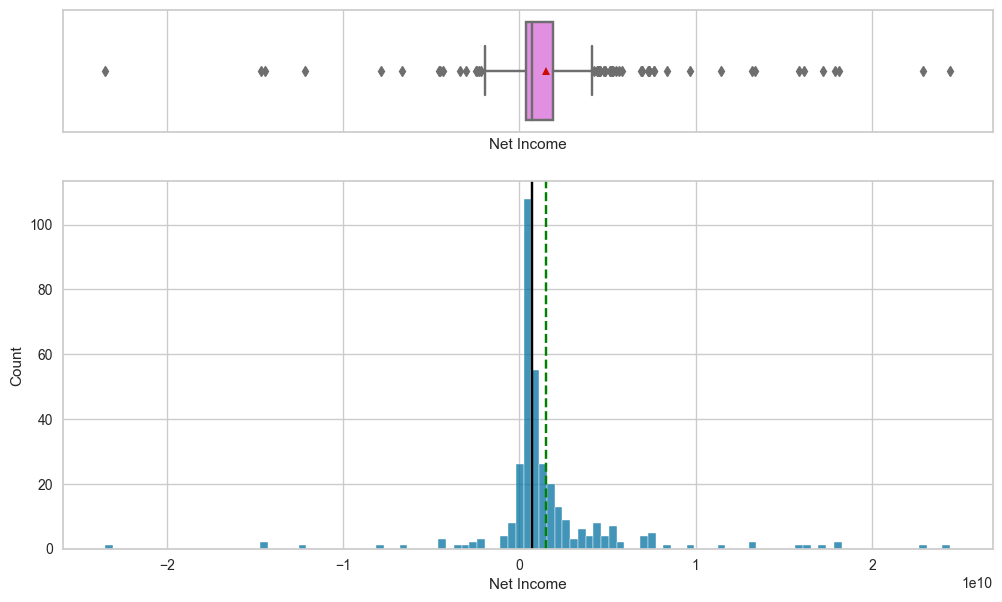

In [18]:
histogram_boxplot(df=df,feature='Net Income')  ## Complete the code to create histogram_boxplot for 'Net Income'

**`Earnings Per Share`**

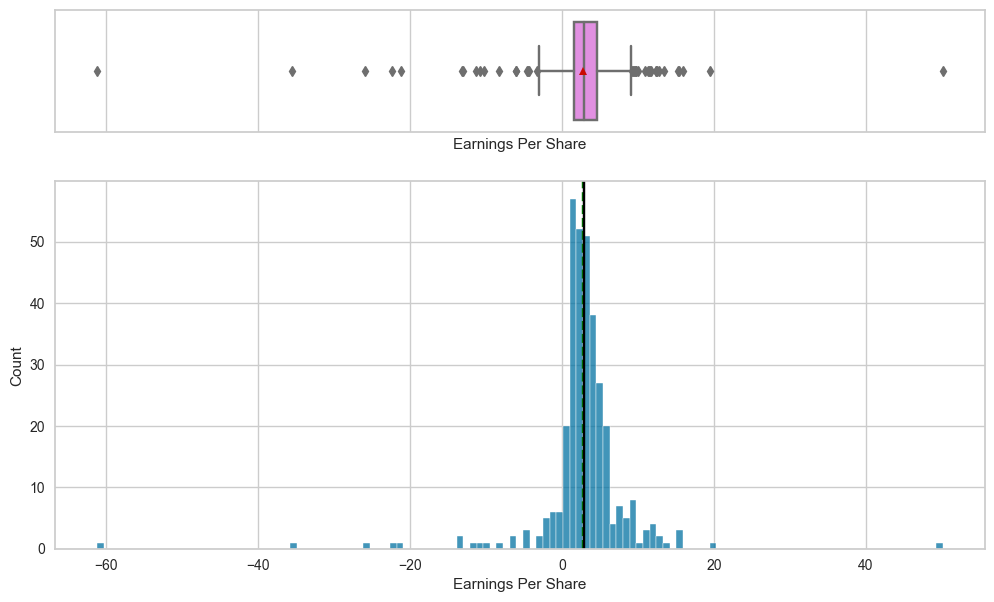

In [19]:
histogram_boxplot(df=df,feature='Earnings Per Share')  ## Complete the code to create histogram_boxplot for 'Earnings Per Share'

**`Estimated Shares Outstanding`**

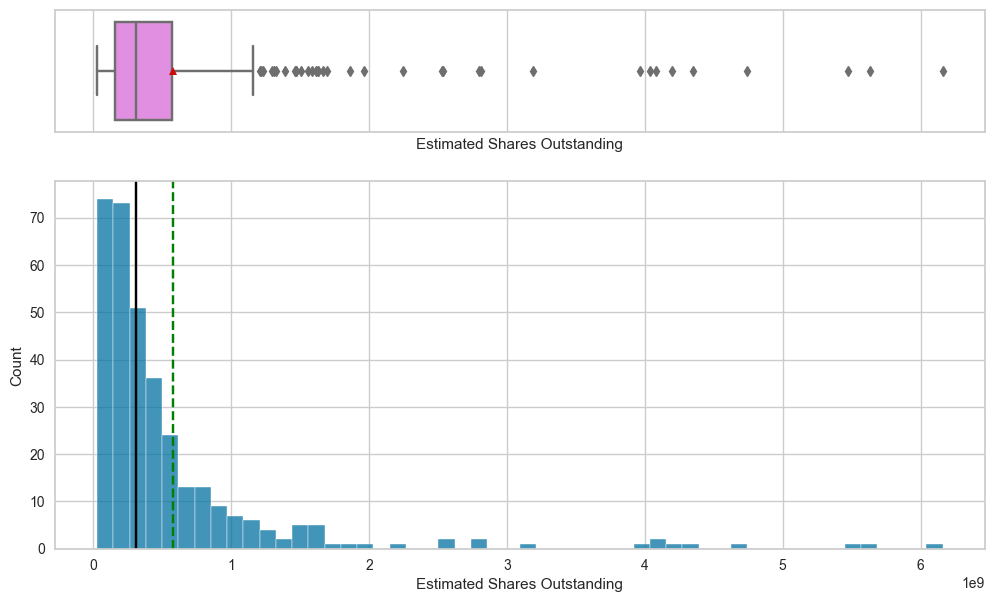

In [20]:
histogram_boxplot(df=df,feature='Estimated Shares Outstanding')  ## Complete the code to create histogram_boxplot for 'Estimated Shares Outstanding'

**`P/E Ratio`**

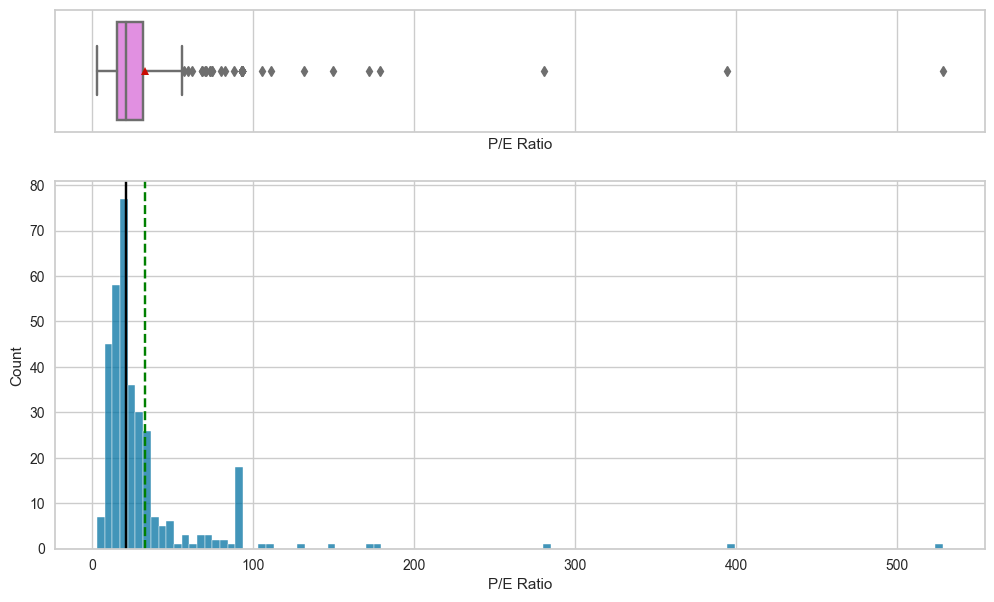

In [21]:
histogram_boxplot(df=df,feature='P/E Ratio')  ## Complete the code to create histogram_boxplot for 'P/E Ratio'

**`P/B Ratio`**

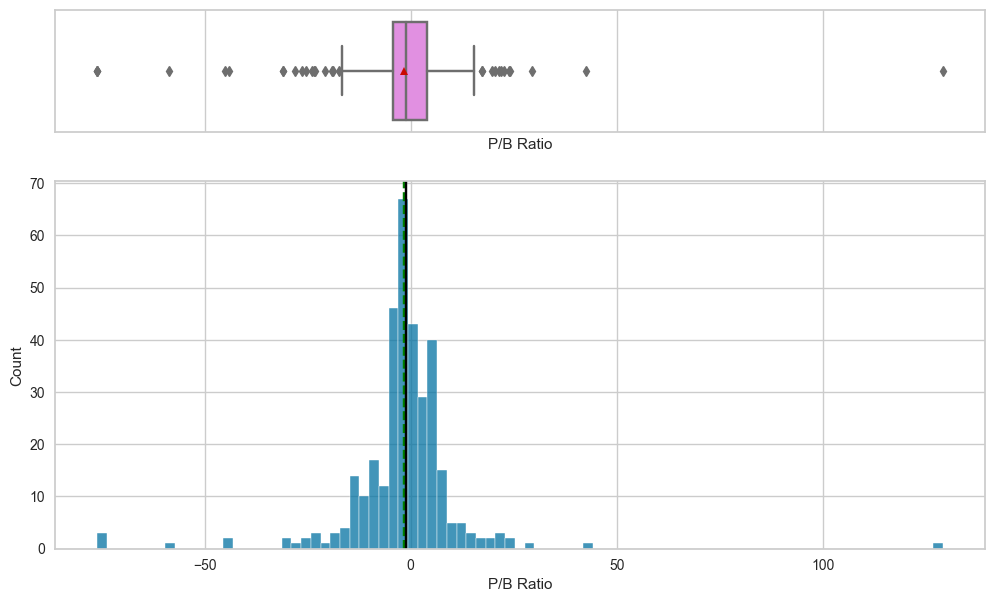

In [22]:
histogram_boxplot(df=df,feature='P/B Ratio')  ## Complete the code to create histogram_boxplot for 'P/B Ratio'

In [23]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

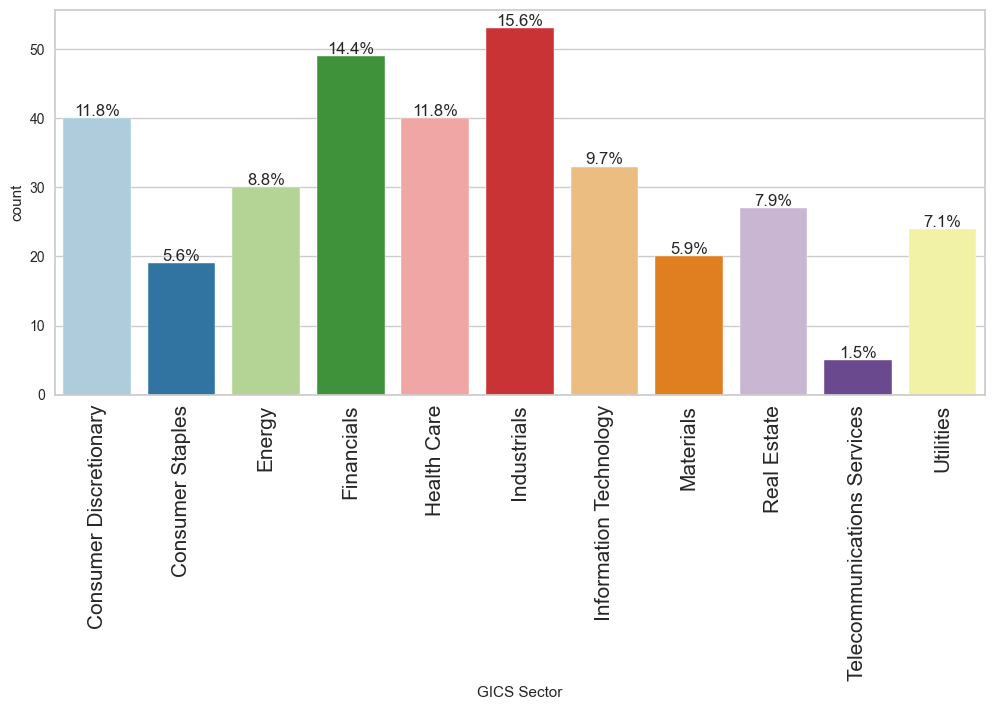

In [24]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

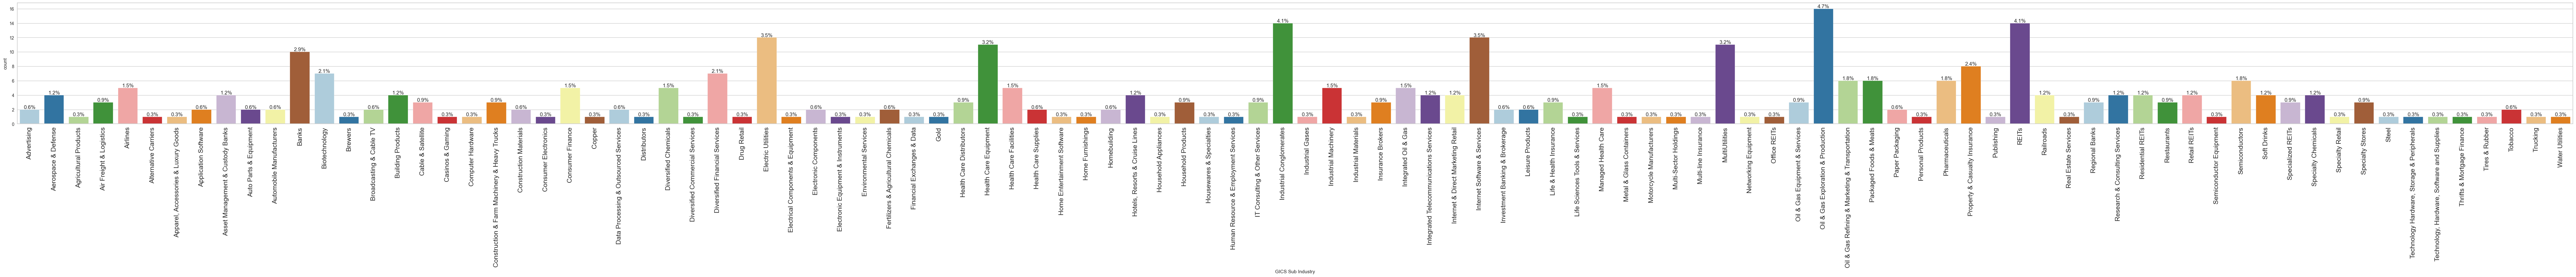

In [25]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)  ## Complete the code to create a labelled barplot for 'GICS Sub Industry'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

debug string value error:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [28]:
df["Security"]

0      American Airlines Group
1                       AbbVie
2          Abbott Laboratories
3            Adobe Systems Inc
4         Analog Devices, Inc.
                ...           
335                 Yahoo Inc.
336            Yum! Brands Inc
337     Zimmer Biomet Holdings
338              Zions Bancorp
339                     Zoetis
Name: Security, Length: 340, dtype: object

### Bivariate Analysis

In [29]:
df_nameless = df.drop(["Security", "Ticker Symbol"], axis=1)

The following steps are adapted from chatgpt3 (Up to (including) create heat map of the reordered pivot table):

Create a pivot table, with indexes for 2 naming columns
Ticker Name and Security.

chatgpt3: use pairplot and scatterplot:

estimated time for sns.pairplot: ~26.1 - 26.8 s

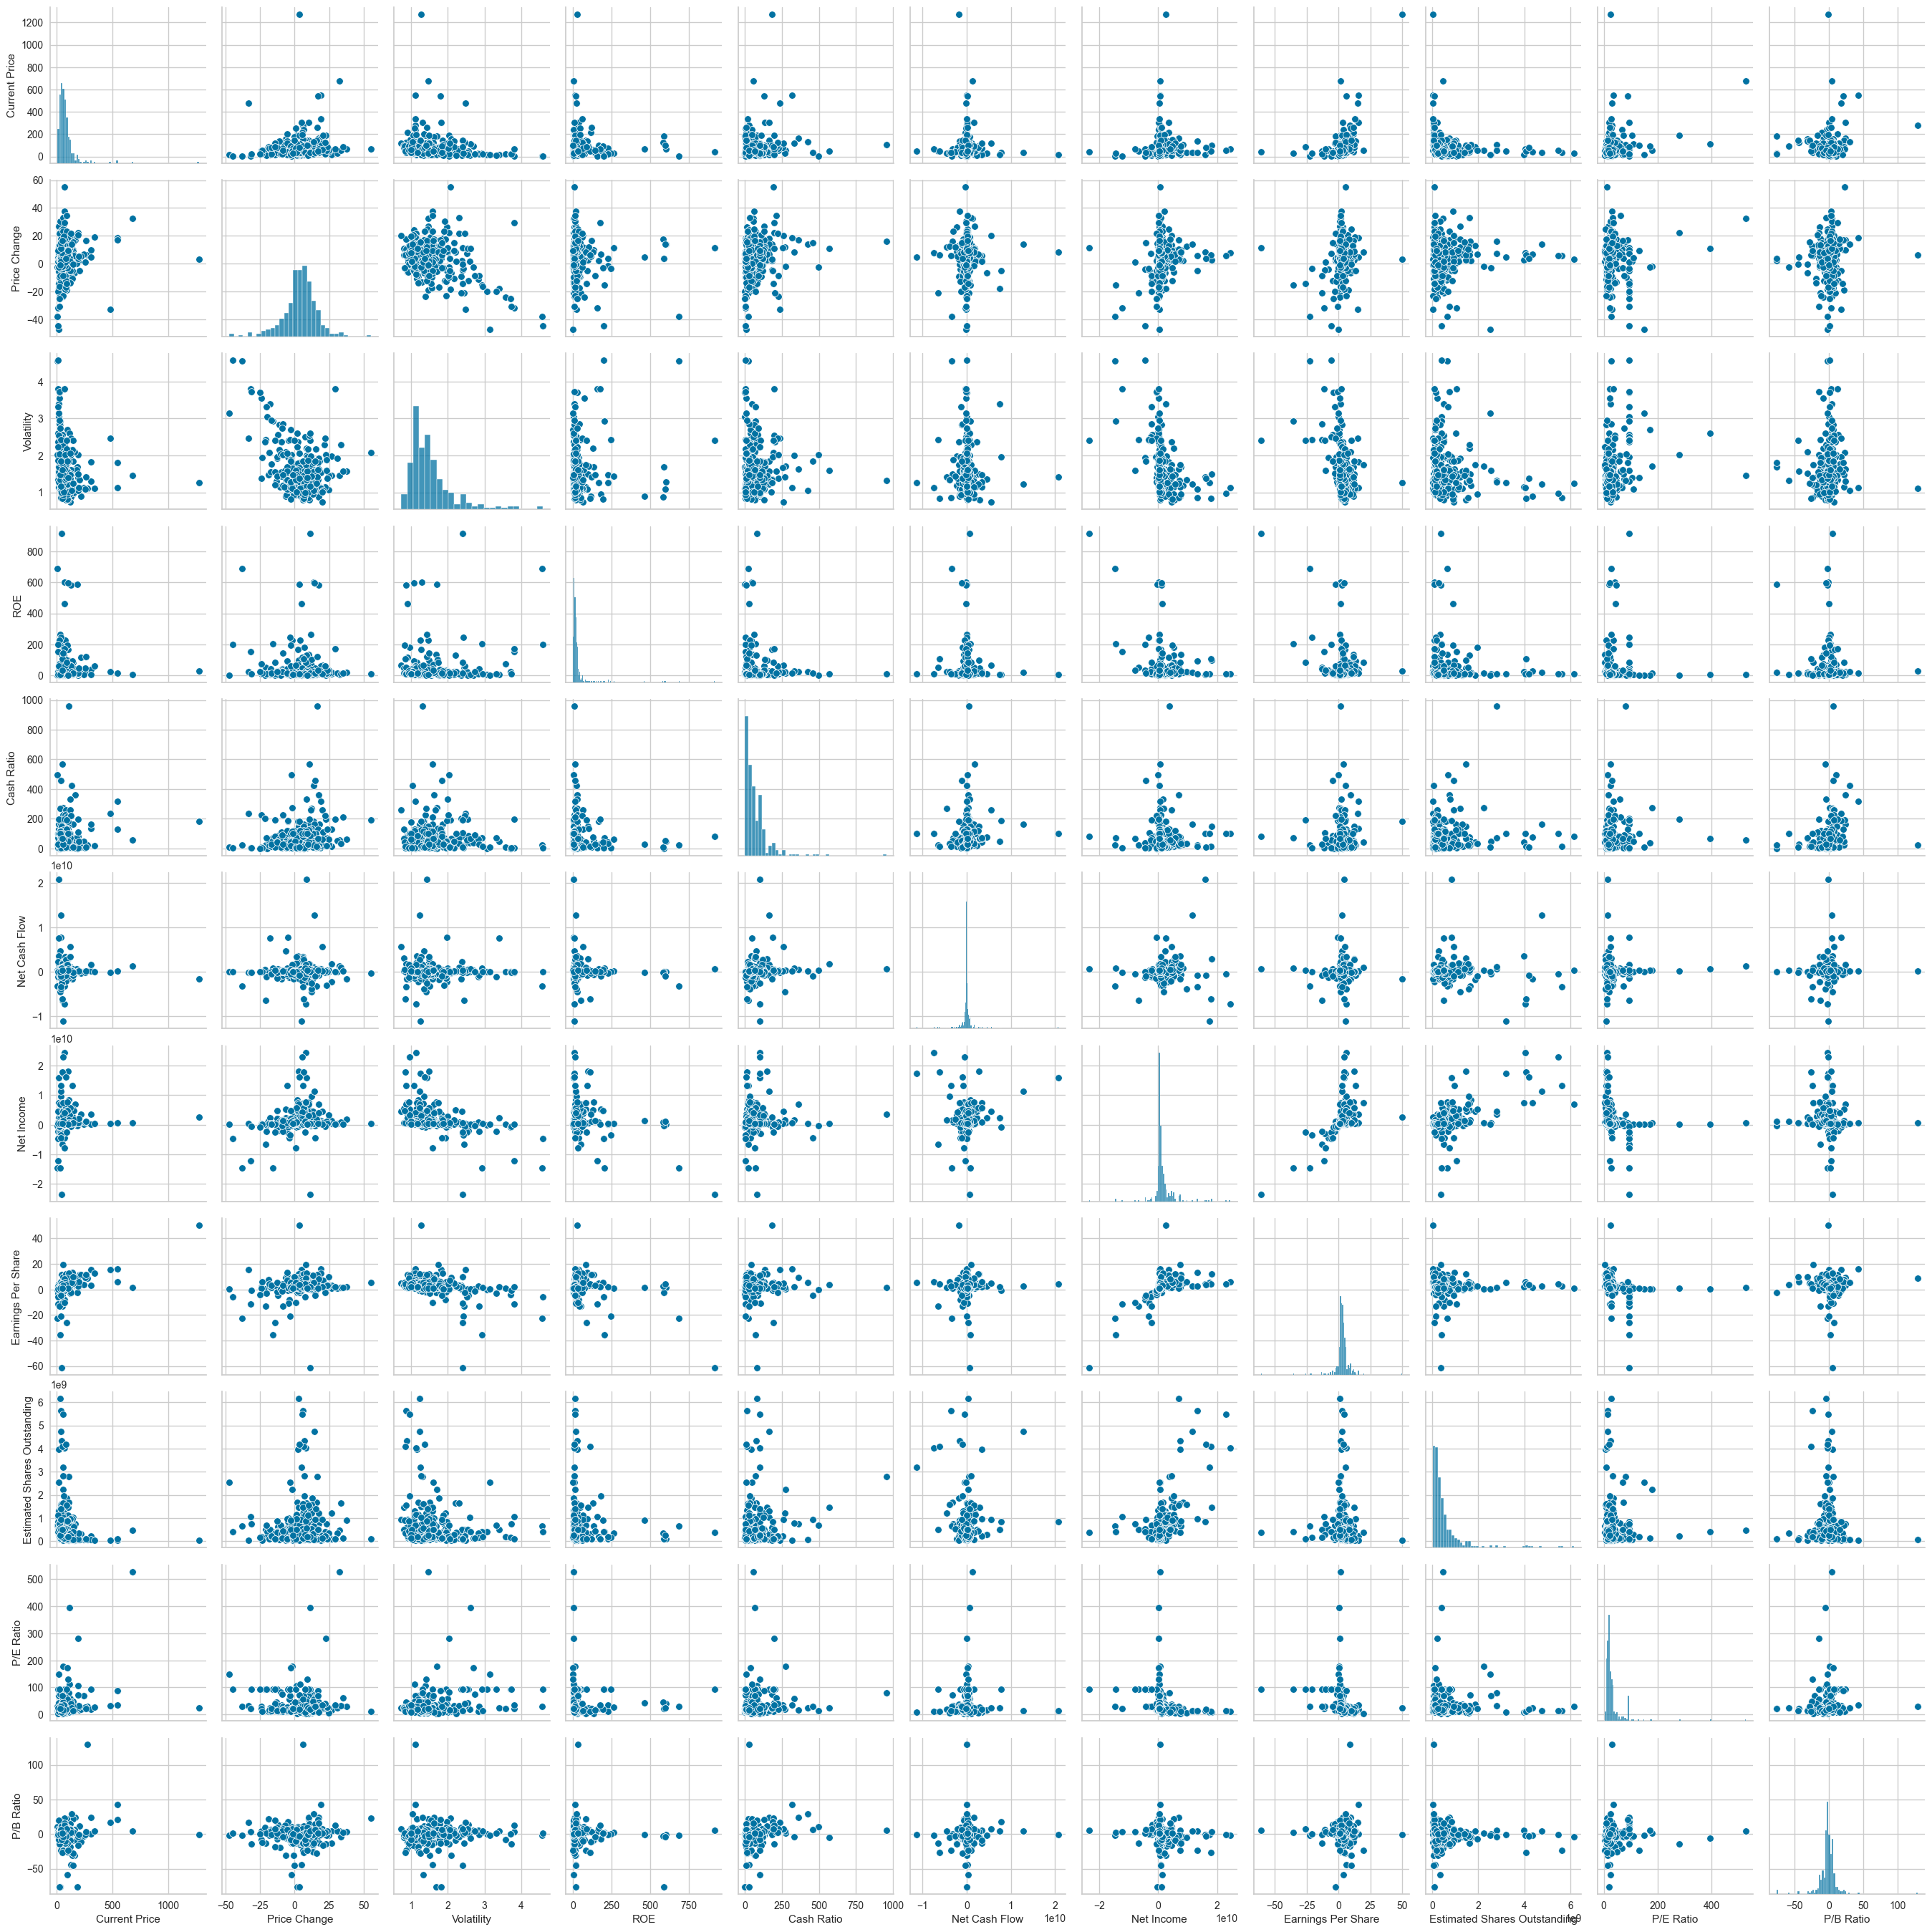

In [30]:
sns.pairplot(df)

- [stackoverflow | nested loop, counters 1 apart](https://stackoverflow.com/questions/56929931/how-to-run-a-nested-loop-in-python-inside-list-such-that-the-outer-loop-starts-f)

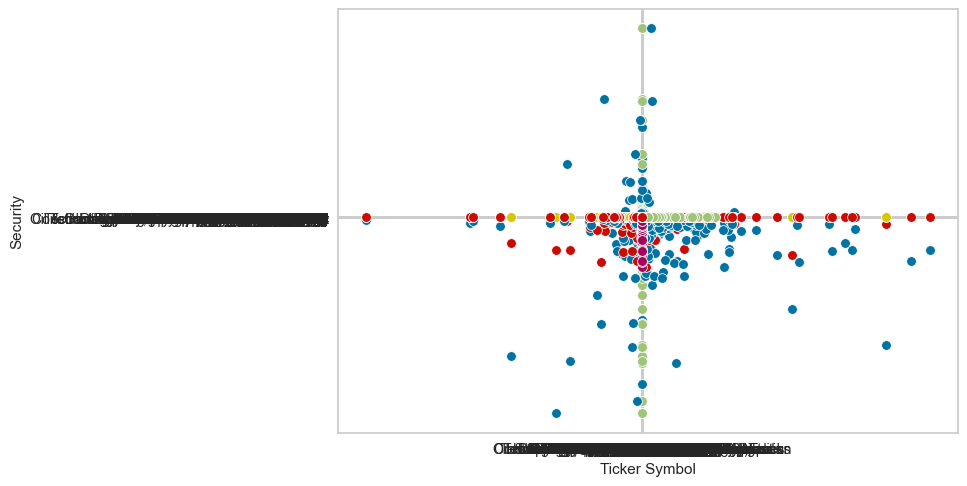

In [31]:
for i, col, in enumerate(df.columns):
    old_col=col
    # for j, new_col in enumerate(df.columns)+1:
    for k in range(i+1, len(df.columns)): # GitHub Copilot, Tabnine AI
        sns.scatterplot(data=df, x=df.columns[i], y=df.columns[k]) # chatgpt3, stackoverflow.nested_loop

- [Towards DataScience | Quadrant Analysis](https://towardsdatascience.com/how-to-perform-a-quadrant-analysis-in-python-9f84d36f8a24) "A Quadrant chart is ... a scatter plot ... divided into 4 sections / quadrants"

### Create a pivot table of the DataFrame, with Name1 and Name2 as index, Category1 and Category2 as columns, and Value as the values:

```
pivot = df.pivot_table(values='Value', index=['Name1', 'Name2'], columns=['Category1', 'Category2'], fill_value=0)
```


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

`sel_cols = [c for c in df.columns if df[c].dtype in ['object', 'datetime64[ns]']]`
[sparkbyexample | select columns by type](https://sparkbyexamples.com/pandas/pandas-get-list-of-dataframe-columns-based-on-data-type/#:~:text=Using%20DateFrame.,based%20on%20the%20data%20type.&text=In%20case%20if%20you%20wanted,based%20on%20the%20data%20type.&text=Alternatively%2C%20if%20you%20are%20using,column%20names%20by%20data%20type.)

In [33]:
# list comprehensions per chatgpt3
idx_cols=[c for c in df.columns if df[c].dtype in ['object']] # GitHub Copilot
valu_cols=[c for c in df.columns if df[c].dtype in ['float64', 'int64']] # GitHub Copilot, Tabnine AI

In [34]:
pivot = df.pivot_table(values=valu_cols, index=idx_cols, aggfunc='mean') # GitHub Copilot, Tabnine AI



### Compute the pairwise distances between the rows of the pivot table:

```
row_dist = pd.DataFrame(squareform(pdist(pivot, metric='euclidean')), columns=pivot.index, index=pivot.index)
```


In [35]:
# NameError: name 'squareform' is not defined # ChatgGPT3
# from scipy.spatial.distance import pdist, squareform
row_dist=pd.DataFrame(squareform(pdist(pivot, metric='euclidean')), columns=pivot.index, index=pivot.index) # GitHub Copilot, Tabnine AI, ChatGPT3


### Compute the linkage matrix using the distances:

```
row_clusters = linkage(row_dist, method='complete')
```


In [36]:
row_clusters = linkage(row_dist, method='complete')


Create the dendrogram of the clusters:

```
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
```


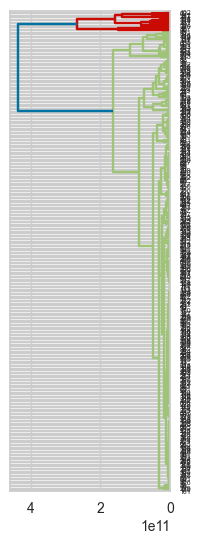

In [37]:
fig = plt.figure(figsize=(8,8))
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')


### Reorder the pivot table according to the clustering:

```
df_rowclust = pivot.iloc[row_dendr['leaves']]
```


In [38]:
df_rowclust = pivot.iloc[row_dendr['leaves']]


### Create the heatmap of the reordered pivot table:

```
sns.heatmap(df_rowclust, cmap='RdBu_r')
```

<Axes: ylabel='Ticker Symbol-Security-GICS Sector-GICS Sub Industry'>

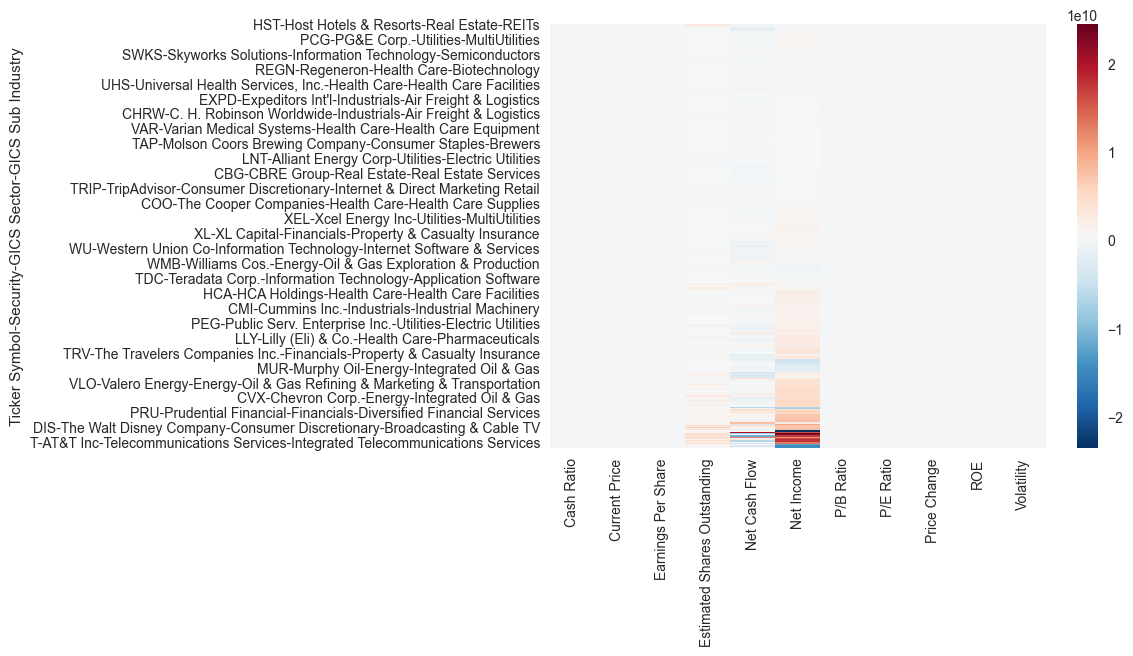

In [39]:
sns.heatmap(df_rowclust, cmap='RdBu_r')

In [40]:
# correlation check

# plt.figure(figsize=(15, 7))
# sns.heatmap(
#     df_nameless.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
# )
# plt.show()

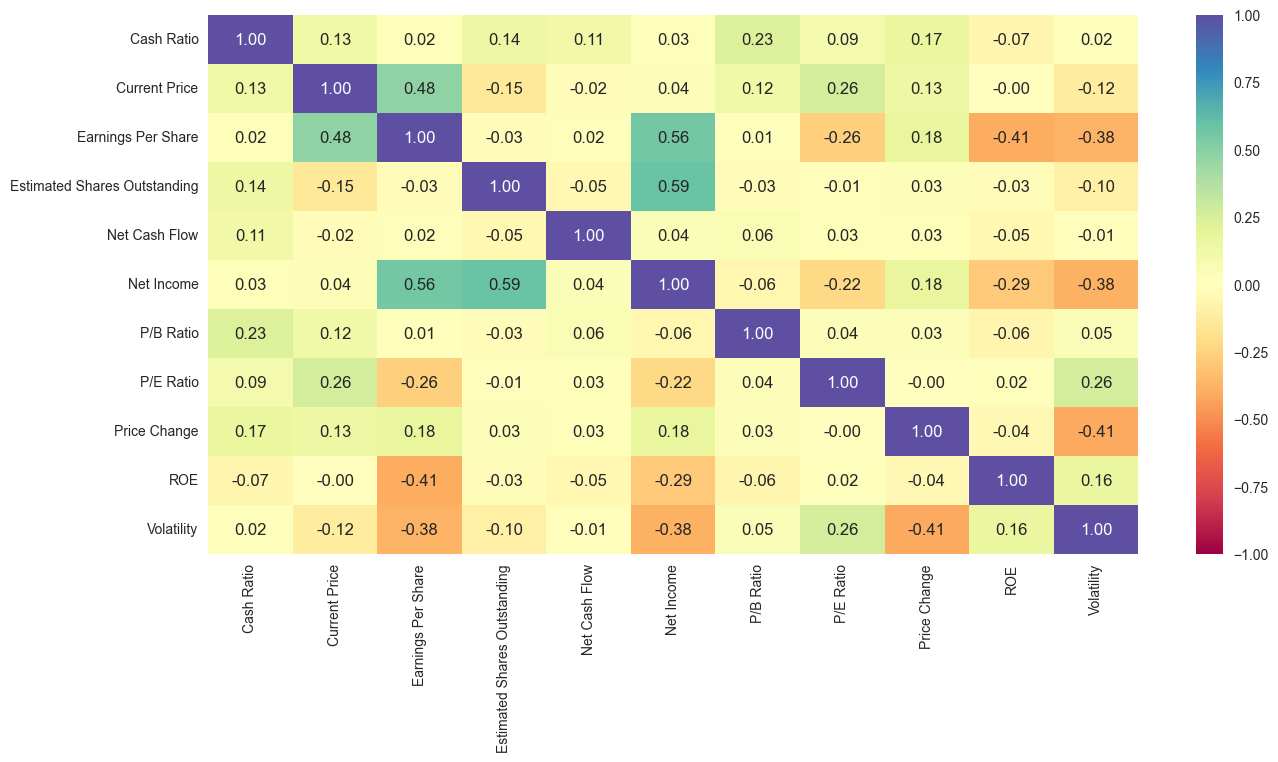

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_rowclust.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

### Positive Correlations:
From the above analysis, in which a heatmap was created from a dataframe which was created from reordering Ticker Name, Security, GICS Sector, and GICS Sub Industry: (GitHub Copilot assisted.)

Estimated Shares Outstanding and P/E Ratio are not highly correlated. (although GitHub Copilot suggested they would be.)

("Highly" is used relatiely here, as the correlations are not extremely high for any variable pair.)

Net Income is highly correlated to Earnings Per Share, and Estimated Shares Outstanding. (56%, 59%, respectively)

Earnings per share is also highly correlated to Current Price. (48%)

----------

### Negative Correlations:
Puzzlingly, from this heatmap: if you get good Earnings per Share you would expect a poor Return on Equity (ROE) ( -41%).
- One way to explain this maybe that if the particular stock you are analyzing is a high growth stock, then you would expect a low ROE, as the company is reinvesting its profits into growth. (This is a common strategy for high growth companies, as they are trying to grow their business as fast as possible, and they are not interested in paying dividends to shareholders, as they are trying to reinvest their profits into growth.) (From GitHub Copilot.)
- Another explanation might be that the company is not profitable, and is not paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A third explanation might be that the company is not profitable, and is paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A fourth explanation might be that the company is profitable, and is paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- A fifth explanation might be that the company is profitable, and is not paying dividends to shareholders, and is reinvesting its profits into growth. (From GitHub Copilot.)
- Case 6: The company is profitable, and is paying dividends to shareholders, and is not reinvesting its profits into growth. (From GitHub Copilot.)
- Case 7: The company is profitable, and is not paying dividends to shareholders, and is not reinvesting its profits into growth. (From GitHub Copilot.)
To put these previous 4 points into a 2 x 2 matrix with the 2 axes being: "Is the company profitable?" and "Is the company reinvesting its profits into growth?", we get the following matrix:<br>
| case | profitable | reinvesting profits into growth | paying dividend  | case | issue                                                                    |<br>
| ---- | ---------- | ------------------------------- | ---------------  | ---- | -----                                                                    |<br>
|  1   | yes        | yes                             | y/n              |  1   | N/A                                                                      |<br>
|  2   | no         | yes                             | no               |  2   | no profits to reinvest in growth                                         |<br>
|  3   | no         | yes                             | yes              |  3   | don't dividends get paid out of profits? (Also reinvesting (no) profits) |<br>
|  4   | yes        |                                 |                  |  4   |                                                                          |<br>
The above matrix can be used to explain the negative correlation between ROE and Earnings per Share. (From GitHub Copilot.)


note: Excel file heatmap_insights_anaysis.xlsx must be open for load() from xlwings library to run

In [43]:
# loads from excel using xlwings
load()

,profitable,reinvesting profits into growth,paying dividend,case,issue
case,,,,,
1.0,y,y,y/n,1.0,N/A
2.0,n,y,n,2.0,no profits to reinvest in growth
3.0,n,y,y,3.0,don't dividends get paid out of profits? (Also...
4.0,y,y,y,4.0,N/A
5.0,y,y,n,5.0,None
6.0,y,n,y,6.0,None
7.0,y,n,n,7.0,None
8.0,None,None,None,8.0,None


### Further reasoning on negative correlation explanation:
Possibly that gains are already priced into stocks with good Earnings per Share, 

so that the stock price is already high,

and so that the stock price is not expected to rise further. (From GitHub Copilot.)

Therefore, Return on Equity is unlikely in this case of high Earnings per Share.

This is due to the mantra to buy low and sell high. (From GitHub Copilot.)

To reiterate, it makes sense intuitively to consider the hypothetical case that:

a company has good profits (Earnings)

and low stock price (GH Copilot)

so Earnings per Share is high (high EPS).

However, this is likely to change as soon as Earnings come in (earnings season).

### Earnings Season:

[When is earnings Season 2023 US?](https://www.ii.co.uk/investing-with-ii/international-investing/us-earnings-season)
[Investopedia | Earnings Season](https://www.investopedia.com/terms/e/earningsseason.asp#:~:text=Earnings%20season%20typically%20begin%20in,to%20non%2Dearnings%20season%20levels.)
```
Earnings season 
typically begin 
in the month following 
most major companies' fiscal quarters: 
```


**January, April, July, and October.**

```
It generally lasts about 6 weeks, 
at which point the number of earnings reports being released 
return to non-earnings season levels.
```

### Explaining Return on Equity negative correlation with Earnings per share (-41% correlation from heatmap) (continued):


To return to the subject of trying to explain the inverse correlation between ROE and EPS, GitHub Copilot suggested that this was a function of reinvestment of profits and paying a dividend. However, since both of these would appear to be dependent on being profitable, more certainly over an extended period of time, some of the answers given seem  to be contradictory.

One explanation that seems to make sense is that as soon as a company publishes earnings (profits), these are factored into the price, and therefore earnings per share is no longer a good indicator of future price, but instead is a lagging indicator (rather than a leading indicator).

### Lagging indicators:

According to geckoboard.com: 

```
Lagging indicators take a long time to change, and show the later-stage results of your efforts. Leading indicators, on the other hand, measure the activities you think will help you reach your goal, and can be tracked on a more ongoing basis.
```
- [Leading / Lagging Indicators | geckoboard.com](https://www.geckoboard.com/blog/leading-lagging-or-lost-how-to-find-the-right-key-performance-indicators-for-your-sales-team/#:~:text=Lagging%20indicators%20take%20a%20long,on%20a%20more%20ongoing%20basis.)

However, we will try for another explanation of leading and lagging indicator.

----------------

### Leading, Lagging and Coincident Indicators:

- [TRADING  > TRADING STRATEGIES > Leading, Lagging, and Coincident Indicators | investopedia.com](https://www.investopedia.com/ask/answers/what-are-leading-lagging-and-coincident-indicators/)

Economists and investors are constantly watching for: 
- signs of what's immediately ahead for the markets and 
    - for the larger economy. 

The most closely watched of these signs are:
- **economic or business statistics** that are 
    - **tracked from month to month** and
        - therefore **indicate a pattern**. 

All indicators fall into 1 of 3 categories:

1. <u>Leading indicators</u> are considered to point toward future events.
2. <u>Lagging indicators</u> are seen as confirming a pattern that is in progress.
3. Coincident indicators occur in real-time and clarify the state of the economy.


- [TRADING  > TRADING STRATEGIES > Leading, Lagging, and Coincident Indicators | investopedia.com](https://www.investopedia.com/ask/answers/what-are-leading-lagging-and-coincident-indicators/)

----------------------

### Proposed Consideration of Earnings per Share as a Lagging indicator:

From the above definition of Lagging indicators from investopedia.com, the EPS (Earnings per Share) would seem to indicate a pattern that is retrospective and hence a lagging indicator.

The company carries out business operations:
- These operations in the given wider business environment result in a bottom line indicating profit/loss
- These profits are then reported, usually during earnings season (1st month of each quarter).
- Until profits (earnings) are published the market prices the stock based upon expectation.
- Immediately upon publication the stock price adjusts from pricing based upon expected or forecast earnings to actual published earnings, in a step function change approximated by the heaviside function.
(- This does not account for those stakeholders and personnell in close dealings with the company, (including suppliers, wholesalers, consumers, investors, etc.) who may have greater knowledge of business operations.
    - This sets up a mechanism which may provide information to the market in the form of price, as entities will act in the market according to the information available to them.
        - For this reason, the share price could be thought of as a composite of a lagging indicator (due to earnings only being published quarterly) and a coincident indicator (not because at those moments early in the fiscal quarter when the earnings are published, the price adjustment is basically momentarily coincident with the economic condition (although it could be argued that since these (quarterly earnings reports (10-Q e.g. [APPL 10-Q for Q1 2023](https://www.sec.gov/ix?doc=/Archives/edgar/data/320193/000032019323000006/aapl-20221231.htm))) are compiled retrospectively on last quarter performance they are retrospective albeit slightly-closer
            - to-being-contemporaneous-than-normal, as lagging indicators, briefly at that moment when they are published.))
)




### Apple 10-K Report Excerpt on Competition:

(A summary of key performance indicators and information on the business are published in the 10-K Yearly Shareholder report, publicly available on SEC.gov for all publicly traded companies in the United States.) 

For example, here is an adapted excerpt (on Competition) from the [APPL](https://www.sec.gov/ix?doc=/Archives/edgar/data/320193/000032019322000108/aapl-20220924.htm) 2022 10-K Report, which distills the factors which characterize the market environment in which business operations take place:

```

The markets for the Company’s products and services are

- highly competitive, and

- are characterized by:
    
    1. aggressive price competition
        (- and resulting downward pressure on:
            - gross margins),
    2. frequent introduction of new products and services,
    3. short product life cycles,
    4. evolving industry standards,
    5. continual improvement in product price and performance characteristics,
    6. rapid adoption of technological advancements by competitors, and
    7. price sensitivity on the part of consumers and businesses.

```

### Proposed consideration of price as composed of two factors: concurrent and lagging indicators:

(Side note: An argument (not discussed here) could also be made that price has an element of speculation built in, whether this is a leading indicator is another debate.)

In summary of thoughts to date:
there are 2 mechanisms at work:
 - one which contributes to that practically unknown fraction of the price being broadly a concurrent indicator
    - influenced by live information about the company, and the interaction with the business environment and the wider market.
 - a second which contributes to that practically unkown fraction of the price being broadly a lagging indicator
    - influenced by quarterly reports
        - which are themselves retrospective
            - due to relying on:
                - last quarter's earnings, 
                - as well as: 
                    - due to the fact that information in these reports is quickly incorporated into price as soon as published,
                    - and immediately after the instant of publication:
                        - these reports are no longer relevant to trying to predict future share price.

### Primary Conclusion on Earnings Per Share inverse relationship to Return on Equity:

Therefore, primarily, Earnings Per Share (EPS) is not a leading indicator, and therefore cannot be used as a predictor for future Return on Equity (ROE).

### Secondary Conclusion on Earnings Per Share inverse relationship to Return on Equity:

Secondarily, due to the nature of the "buy low, sell high" mantra, and pursuit of this elusive, retrospective-derived, idealized, theory-based practice in daily swing trading, by the average retail trader...<br>
- and the fact that due to the involvement of human emotion in trading, 
    - exacerbated by the nature of [short and long term debt cycles, contributing to boom and bust](https://youtu.be/w2aNKCG4YFQ) (as early as the tulip bubble of the late 1700s in which the price of the then unknown virus encoded ideopathic pattern on tulip bulbs and speculation of the future crop they would produce caused an irrational spiralling market at city trading benches causing the price of certain highly prized tulip bulbs to exceed the price of a house, to the American Stock Exchange and breakthroughs in [electricity](https://youtu.be/Cidg4Xfpjmc?t=1405) and [wireless](https://youtu.be/X5jPoQzEh-M?t=76) [radio communication](https://youtu.be/X5jPoQzEh-M?t=76), to the roaring 20s, crash of 1929, The Great Depression, the development of physics applications from [vacuum tubes in televisions and mainframe computers](https://github.com/CoderSales/Portfolio_Project_1)([site](https://codersales.github.io/Portfolio_Project_1/), [source-site](https://youtu.be/WnNm_uJYWhA)), to the development of the [Field Effect Transistor](https://en.wikipedia.org/wiki/Field-effect_transistor) into the [Metal Oxide Silicon Field Effect Transistor](https://byjus.com/physics/mosfet/#:~:text=What%20Is%20a%20MOSFET%3F,is%20constructed%20by%20three%20terminals.), ([MOSFET clip](https://youtu.be/Bfvyj88Hs_o?t=2)), [integrated circuits](https://en.wikipedia.org/wiki/Integrated_circuit), the [microprocessor](https://en.wikipedia.org/wiki/Microprocessor), [personal computing](https://en.wikipedia.org/wiki/Personal_computer), the fear of missing out fueling The 1980's Bull Run, driven by the fear of being excluded from the meteoric rise of those stocks fueled by Big Money and Debt, enabling rapid progress, and depending on present regulatory conditions, at times veering towards a Winner Takes all dynamic with rewards disproportionate to differences before the reckoning of the selection of those few companies by the market forces driven by the consumer and the demand for excellence and value at low cost, Black Monday 1987, Commodities Futures Markets in the early 1990s, Internet Stocks in the mid to late 1990s, culminating in the dot-com bubble bursting around the turn of the millenium, as well as anti-trust, pro-competitive, anti-monopoly legislation enacted and enforced by the legislature, leading to the release of the monopoly and break up of Microsoft into Intel and Microsoft, allowing for Google and the noughties Web 2.0 Dominated by search) hype: 

        
- often take over from the logic of investing 60 / 40 stocks and bonds split or simply investing in the Standard & Poor's 500 or other indices.

### Continuing Stocks / Bonds 60/40 split:

#### Alternative views on stock / bond split ratios:

- recent conditions have led to newly proposed: [Bonds Over Stocks: The New 60-40 Portfolio](https://www.wsj.com/articles/bonds-over-stocks-the-new-60-40-portfolio-11673921445)

- [Why a 60/40 Portfolio Is No Longer Good Enough | investopedia.com](https://www.investopedia.com/articles/financial-advisors/011916/why-6040-portfolio-no-longer-good-enough.asp)

```
For many years, a large percentage of financial planners and stockbrokers crafted portfolios for their clients that were composed of 60% equities and 40% bonds or other fixed-income offerings. And these so-called balanced portfolios did rather well throughout the 80s and 90s.

But, a series of bear markets that started in 2000 coupled with historically low-interest rates have eroded the popularity of this basic approach to investing. 
```

#### Discussion on stock / bond split ratios:
- [The 'Investment Committee' weigh in on the traditional 60/40 portfolio](https://youtu.be/rE62oY8KdAc)

### Continuing discussion on neative correlation between Earnings per Share and Return on Equity (-41%):

To summarize thoughts on negative correlation between EPS and ROE:
- as Earnings are already priced into the Share Price:
- and given the aim to buy low and sell high
- with the risk (exacerbated by hype)
    - of only hearing about a recent trend when towards the end of a cycle
        - ironically, when early buyers are looking to liquify their position 
    - may lead to a situation in which the retail trader earnestly seeking to buy low, sell high, 
        - may in fact buy just after the peak, thinking that after a recent fall in price, the price is about to take off again, when in fact the price has hit a [support level](https://www.investopedia.com/trading/support-and-resistance-basics/) (1)
    - the ratio if the Earnings Per Share

----------------
Of note: 

not everyone 'buys into' [technical analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp#:~:text=Key%20Takeaways-,Technical%20analysis%20is%20a%20trading%20discipline%20employed%20to%20evaluate%20investments,the%20security's%20future%20price%20movements.) (2)

```
Technical analysis may be contrasted with fundamental analysis, which focuses on a company's financials rather than historical price patterns or stock trends.
```


----------------

Some opt for [fundamental analysis](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

- which `measures a security's intrinsic value by examining related economic and financial factors.`
- where the `end goal is to determine a number that an investor can compare with a security's current price to see whether the security is`
    -  `undervalued or`
    - `overvalued`
- `by other investors.` (3)


----------------
(1) [TECHNICAL ANALYSIS > TECHNICAL ANALYSIS BASIC EDUCATION > Support and Resistance Basics | Investopedia](https://www.investopedia.com/trading/support-and-resistance-basics/)

(2) [technical analysis | Investopedia](https://www.investopedia.com/terms/t/technicalanalysis.asp#:~:text=Key%20Takeaways-,Technical%20analysis%20is%20a%20trading%20discipline%20employed%20to%20evaluate%20investments,the%20security's%20future%20price%20movements.)

(3) [fundamental analysis | Investopedia](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

### Further reference on Technical Analysis:

- [Charting the Market: S&P 500 Key Levels to Watch](https://youtu.be/T0V334TtgNQ?list=PLWTr_eZZ784IxI_D8x9Ctg4YbAaexGoyS&t=21)

Continuining on both the themes of:
- EPS negatively correlated to ROE and
- fundamental analysis
    - to:<br>
        `determine a number that an investor can compare with a security's current price to see whether the security is`<br>
            -  `undervalued or`<br>
            - `overvalued` (1)

(1) [fundamental analysis | Investopedia](https://www.investopedia.com/terms/f/fundamentalanalysis.asp)

...

If instead of buying low and selling high
retail traders are more likely to buy high and sell low
(particularly in the tract of market history analysed here), 
then it may indicate that
either a good analysis or understanding of the fundamentals is not occurring
or
that despite best efforts emotion is taking over causing mass buying of overheated hyped stock bubbles under the mistaken forecast, say, that upward trends will continue as they are about to burst.

This would in effect lead to the inverted:

buy high sell low.

If this is in fact what is occurring over this period, 

this would be reflected in high earning per share companies 

with good quarterly and yearly reports and businesses

in all or certain areas of the market which may be overheated

being overbought,

so that they have already been overbought, 

leading to fewer shares outstanding, 

creating upward price pressure, due to Keynsian scarcety of supply of the stock,

crashing through resistance bands being supported by the rising tide of buyers watching the price rise and trying to get in on the bull run,

only to be [stopped out](https://www.investopedia.com/terms/s/stoppedout.asp#:~:text=Stopped%20out%20is%20a%20phrase,an%20abrupt%20pullback%20in%20price.)

of trades when the bubble bursts and buyers loose interest, 

leading to

high earnings per share stocks being overbought initally (at high prices) during the up trend,

only to be then oversold in the subsequent correction (possible overcorrection),

([depending on what the coefficient of damping for the economic system being modelled is](https://en.wikipedia.org/wiki/Damping))

and whether there is over and undershoot or not of the theoretical real price of the stock.

- This leads to a negative correlation between Earnings per Share and Return on Equity, with a correlation of -40% for the feature pair in the dataset.

### Side note on Examples of Alternative pressures on stock price:


#### relative performance to competitor performance

- [Ford Motor Co. stock falls Wednesday, underperforms market | MarketWatch](https://www.marketwatch.com/data-news/ford-motor-co-stock-falls-wednesday-underperforms-market-8ea7c5a3-1bbea27370bc)


```
The stock underperformed when compared to some of its competitors Wednesday, as Tesla Inc. TSLA, -7.77% fell 2.02% to $180.59.

Trading volume (68.9 M) eclipsed its 50-day average volume of 68.5 M.

```
(1)



(1) [Ford Motor Co. stock falls Wednesday, underperforms market | MarketWatch](https://www.marketwatch.com/data-news/ford-motor-co-stock-falls-wednesday-underperforms-market-8ea7c5a3-1bbea27370bc)

#### Further note on Ford Motor Company
[April 20, 2023 10:45 AM]
- Monday marks the last chance for investors to receive the next dividend payout from Ford Motor 

- The company announced on Thursday that it would pay shareholders a quarterly dividend of 15 cents per share. On Tuesday, Ford Motor will go ex-dividend, meaning the stock will trade lower to reflect that payout. In other words, the stock will likely open 15 cents lower than it would have opened on any other day.


- [Ford Motor: Dividend Insights](https://www.benzinga.com/news/dividends/23/04/31916677/ford-motor-dividend-insights)

### Price-to-Book Ratio (PB) or (P/B):


- [Price-to-Book (PB) Ratio: Meadning, Formula, and Example](https://www.investopedia.com/terms/p/price-to-bookratio.asp)

- `measures the market's valuation of a company relative to its book value.`

- `to compare a firm's market capitalization to its book value and locate undervalued companies` 

- `ratio is calculated by dividing the company's current stock price per share by its book value per share (BVPS)`

- P/B Ratio= Book Value per Share (BVPS) / Market Price per Share

    - where, 
        - Market Price per Share = Current market price of the share
        - Book Value per Share = (Total assets - intangible assets - total liabilities) ÷ number of outstanding shares



 (1)

(1) [Price-to-Book (PB) Ratio: Meadning, Formula, and Example](https://www.investopedia.com/terms/p/price-to-bookratio.asp)

### intangible assets:


- The following is an adapted excerpt from [What Are Intangible Assets? Examples and How to Value](https://www.investopedia.com/terms/i/intangibleasset.asp):

- Goodwill, brand recognition and intellectual property, such as patents, trademarks, and copyrights, are all intangible assets. 
- Intangible assets exist **in opposition to tangible assets**, 
    - which include:
        - land, 
        - vehicles,
        - equipment, and
        - inventory.

- Additionally, financial assets such as:
    - stocks and
    - bonds,
        - which derive their value from:
            - contractual claims, 
    -are considered tangible assets.

(1)

(1) [What Are Intangible Assets? Examples and How to Value](https://www.investopedia.com/terms/i/intangibleasset.asp)

### Next steps in Bivariate Analysis:

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

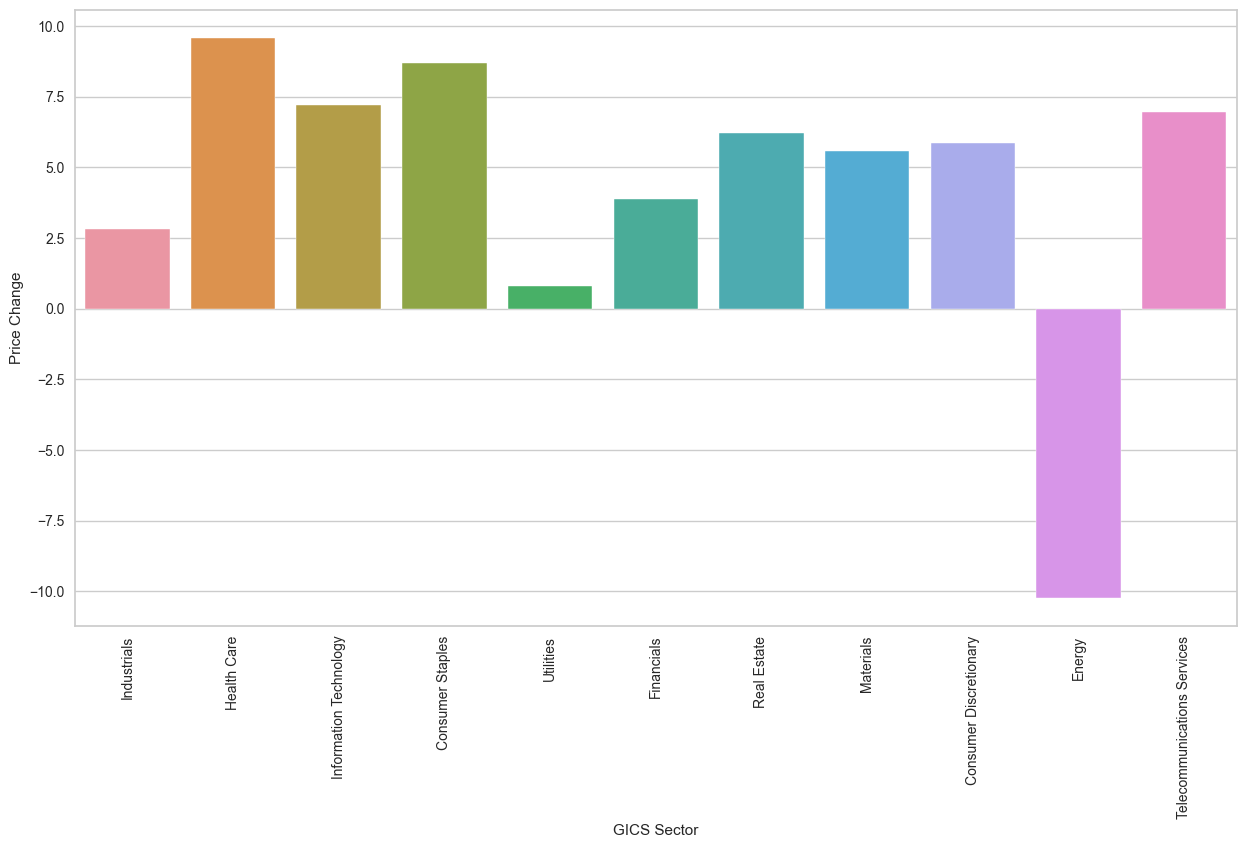

In [45]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False) ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### Upon inspection of the above barplot:

- Over the period of this analysis, the Energy Sector experienced a negative Price Change.
- All other industrial sectors had positive price changes over the period.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

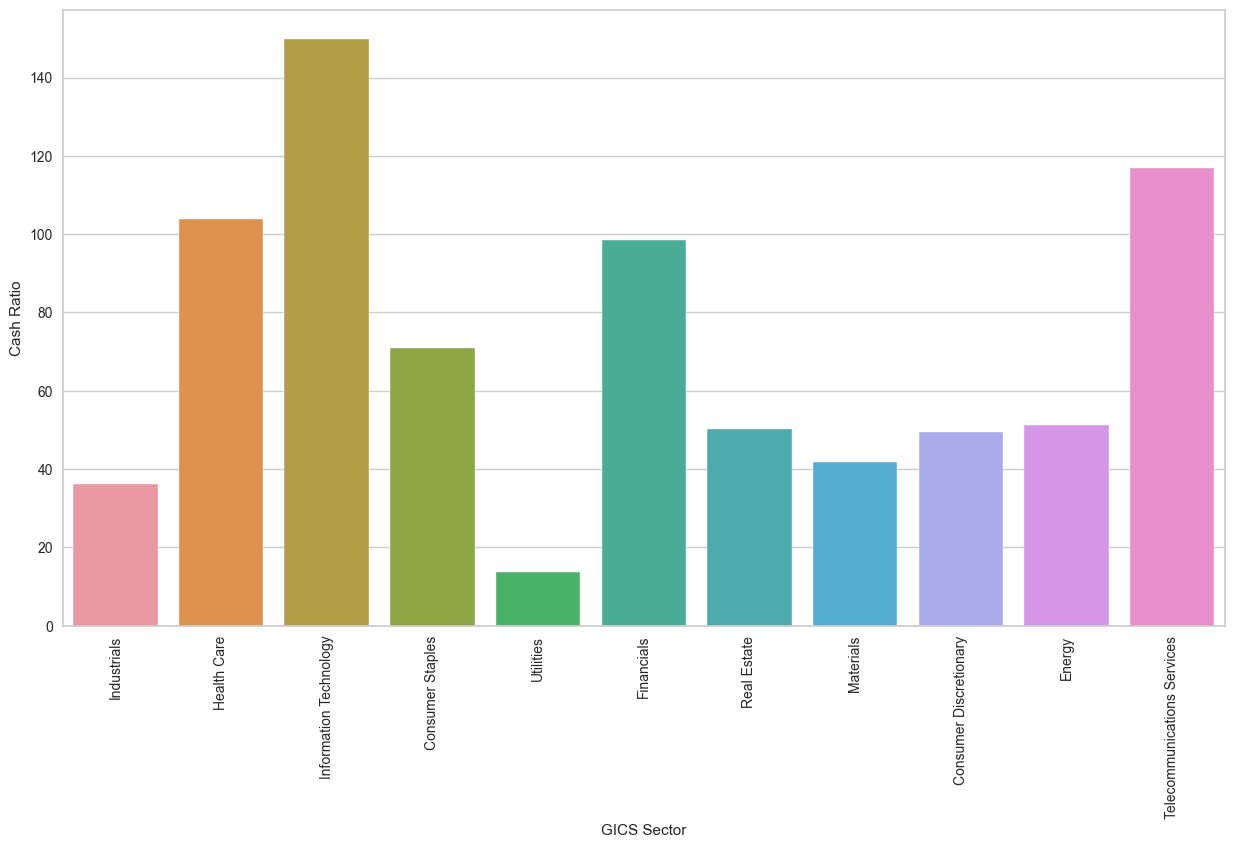

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### From the above barplot of GICS Sector versus Cash Ratio (for the 11 GICS Sectors shown on the X-axis):

- The highest Cash Ratio was in Information Technology (at approximately 150).
- The next highest Cash Ratio was in Telecommunications Service (at just below 120).
- The third highest Cash Ratio was in Health Care (at just above 100).
- The fourth highest Cash Ratio was in Financials (at just below 100).
- The fifth highest Cash Ratio (significantly lower) was Consumer Staples (at approximately 70).
- In contrast, (a few ranks below those mentioned above, thus breaking the sequence) Consumer Discretionary Cash Ratio was around 50, on par with Energy and Real Estate for Ranks 6, 7 and 8.
- Ranks 9, 10 and 11 are: Matrials, Industrials and Utilities to round out the Cash Ratio Rankings per GICS Sector.


------------------------------

###### Note on Cash Ratio
The following is a quote adapted from [Cash Ratio | Investopedia](https://www.investopedia.com/terms/c/cash-ratio.asp#:~:text=The%20cash%20ratio%20is%20a%20liquidity%20measure%20that%20shows%20a,by%20its%20total%20current%20liabilities.)

- a measurement of a company's liquidity. 
- It specifically calculates the ratio of a company's:
    - total cash and cash equivalents to its
    - current liabilities.
- The metric evaluates company's ability to repay its short-term debt 
    - with cash or near-cash resources, 
        - such as easily marketable securities. 

(1)


(1) [Cash Ratio | Investopedia](https://www.investopedia.com/terms/c/cash-ratio.asp#:~:text=The%20cash%20ratio%20is%20a%20liquidity%20measure%20that%20shows%20a,by%20its%20total%20current%20liabilities.)

---------------------------

The following is a quote adapted from [CORPORATE FINANCE > ACCOUNTING > Marketable Securities | Investopedia](https://www.investopedia.com/terms/m/marketablesecurities.asp)

- liquid financial instruments that can be quickly converted into cash at a reasonable price.

(1)

(1) [CORPORATE FINANCE > ACCOUNTING > Marketable Securities | Investopedia](https://www.investopedia.com/terms/m/marketablesecurities.asp)

-----------------------

The following is a quote adapted from [INVESTING > INVESTING BASICS > Financial Instruments | Investopedia](https://www.investopedia.com/terms/f/financialinstrument.asp)

assets that can be traded, or they can also be seen as packages of capital that may be traded.
- Most types of financial instruments provide efficient flow and transfer of capital all throughout the world’s investors.
- These assets can be in the form of:
    - cash,
        - a contractual right to deliver or receive cash or 
            - another type of financial instrument, or 
    - evidence of one’s ownership in some entity.

(1)

(1) [INVESTING > INVESTING BASICS > Financial Instruments | Investopedia](https://www.investopedia.com/terms/f/financialinstrument.asp)

-----------------------------

The following is a quote adapted from [ECONOMY > ECONOMICS > Capital](https://www.investopedia.com/terms/c/capital.asp)

###### Capital: Definition, How It's Used, Structure, and Types in Business

Capital is a broad term that can describe anything that:
- confers value or benefit to its owners, 
    - such as a factory and its 
        - machinery,
        - intellectual property like:
            - patents, or the
            - financial assets:
                - of a business or an
                - individual.

While money itself may be construed as capital,
- capital is more often associated with:
    - cash 
        - that is being put to work for:
            - **productive** or
            - **investment purposes**.
 In general,
- capital is a critical component of **running a business**
    - from **day to day** and
    - financing its **future growth**.



(1)

(1) [ECONOMY > ECONOMICS > Capital](https://www.investopedia.com/terms/c/capital.asp)

----------------------------------------

The following is a quote adapted from: [TRADING SKILLS > TRADING BASIC EDUCATION > Investor](https://www.investopedia.com/terms/i/investor.asp)

###### What Does an Investor Do? What Are the Different Types? [Updated February 17, 2023]

An investor is any person or other entity (such as a firm or mutual fund)
- who commits capital with the expectation of receiving financial returns. 

Investors rely on different financial instruments 
- to earn a rate of return and accomplish important financial objectives like:
    - building retirement savings, 
    - funding a college education, or merely
    - accumulating additional wealth over time.

(1)

(1) [TRADING SKILLS > TRADING BASIC EDUCATION > Investor](https://www.investopedia.com/terms/i/investor.asp)

------------------------------

The following is a quote adapted from: [CORPORATE FINANCE > ACCOUNTING > Financial Assets](https://www.investopedia.com/terms/f/financialasset.asp)

###### Financial Asset Definition and Liquid vs. Illiquid Types

A financial asset is a:
- liquid asset
    - that gets its value from a:
        - contractual right or
        - ownership claim.
    - Cash,
    - stocks,
    - bonds,
    - mutual funds, and
    - bank deposits 
        are all are examples of financial assets. 
    
    Unlike:
    - land,
    - property,
    - commodities, or other
    - tangible physical assets,
    
    financial assets do not necessarily have inherent:
    - physical worth or even a
    - physical form.
    
    Rather, their value reflects **factors of supply and demand**
    - in the marketplace in which they trade,
    - as well as the degree of **risk** they carry.

(1)

(1) [CORPORATE FINANCE > ACCOUNTING > Financial Assets](https://www.investopedia.com/terms/f/financialasset.asp)

----------------------

The following is a quote adapted from: [CORPORATE FINANCE > FINANCIAL STATEMENTS > Asset](https://www.investopedia.com/terms/a/asset.asp)

###### What Is an Asset? Definition, Types, and Examples [Updated March 29, 2023]

An asset is a
- resource with economic value that an:
    - individual,
    - corporation, or
    - country 
- owns or controls with the
- expectation that it will provide a future benefit.

(1)

(1) [CORPORATE FINANCE > FINANCIAL STATEMENTS > Asset](https://www.investopedia.com/terms/a/asset.asp)

------------------------------

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

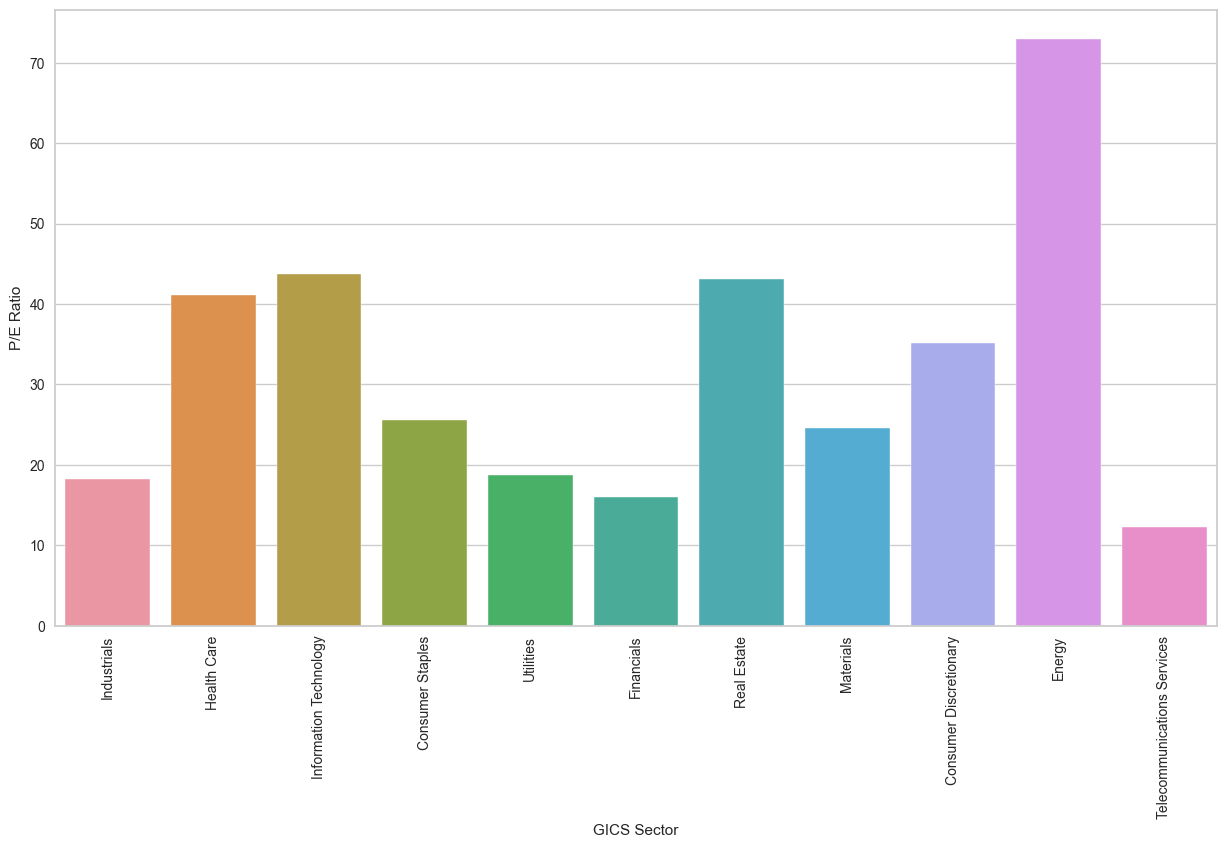

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

###### From the above barplot:

- Energy had the highest P/E Ratio at over 70.
- The next highest 3 sectors were close in P/E Ratio (just above 40, and barely over half that of Energy ):
    - They were Information Technology (2nd), followed by
    - Real Estate (3rd), and
    - Health Care (4th)
- The 5th highest was Consumer Discretionary at around 35.
- The 6th highest was Consumer Staples at around 25.
- The 7th highest was Materials also around 25.
- The next 2 sectors came in at just under 20 for P/E Ratio:
    - They were Industrials, and
    - Utilities
- The 10th highest was Financials at just over 15
- The 11th highest was Telecommunications Services at just over 10.

------------------------------

[P/E Ratio | INVESTING  FUNDAMENTAL ANALYSIS](https://www.investopedia.com/terms/p/price-earningsratio.asp)

###### P/E Ratio - Price-to-Earnings Ratio Formula, Meaning, and Examples:

- The price-to-earnings ratio is the ratio for valuing a company that measures its current share price relative to its earnings per share (EPS). 

- The price-to-earnings ratio is also sometimes known as the:
    - **price multiple** or the 
    - **earnings multiple**.

- P/E ratios are used by:
    - investors and
    - analysts
- to determine the relative value of a company's shares
- in an **apples-to-apples comparison**. 

- It can also be used to compare:
    - a company against its 
    - **own historical record** or to
- compare:
    - **aggregate markets** against: 
        - one another or
        - over time.

P/E may be estimated on a:
- trailing (backward-looking) or
- forward (projected) basis.




(1)

(1) [P/E Ratio | INVESTING  FUNDAMENTAL ANALYSIS](https://www.investopedia.com/terms/p/price-earningsratio.asp)

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='___', y='___', ci=False)  ## Complete the code to choose the right variables
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

In [ ]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = "___"  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [ ]:
k_means_df = subset_scaled_df.copy()

In [ ]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

In [ ]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans('___', random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

In [ ]:
# final K-means model
kmeans = KMeans(n_clusters='___', random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [ ]:
km_cluster_profile = df1.groupby("___").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("___")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1["___"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["___"] == cl]["Security"].unique())
    print()

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- 


## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ['___'] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ['___'] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

**Let's explore different linkage methods with Euclidean distance only.**

In [ ]:
# list of linkage methods
linkage_methods = ['___'] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm
        
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

In [ ]:
# list of linkage methods
linkage_methods = ['___'] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

### Creating model using sklearn

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters='___', affinity='___', linkage='___')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [ ]:
hc_cluster_profile = df2.groupby("___").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("___")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df2["____"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["___"] == cl]["Security"].unique())
    print()

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

## Actionable Insights and Recommendations

- 


___